TIME SERIES FORECASTING

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()


In [2]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download("GOOG",
                   start=start_date,
                   end=end_date,
                   progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2024-06-14,175.852005,178.729996,175.852005,178.369995,178.369995,12361600
246,2024-06-17,176.979996,179.919998,176.490005,178.779999,178.779999,15272900
247,2024-06-18,178.789993,178.910004,175.619995,176.449997,176.449997,15640300
248,2024-06-20,176.710007,178.740005,176.460007,177.710007,177.710007,16753200
249,2024-06-21,178.490005,182.511993,178.059998,180.259995,180.259995,58903200


In [3]:
yt = data[["Date", "Close"]]
yt.head()

,Date,Close
0,2023-06-26,119.089996
1,2023-06-27,119.010002
2,2023-06-28,121.080002
3,2023-06-29,120.010002
4,2023-06-30,120.970001


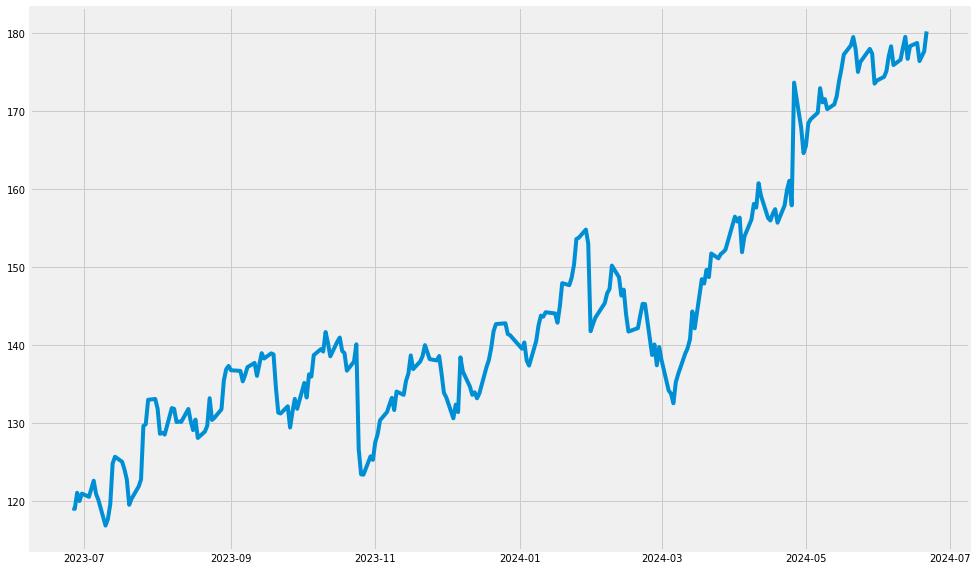

In [4]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,10))
plt.plot(yt["Date"],yt["Close"])

<Figure size 432x288 with 0 Axes>

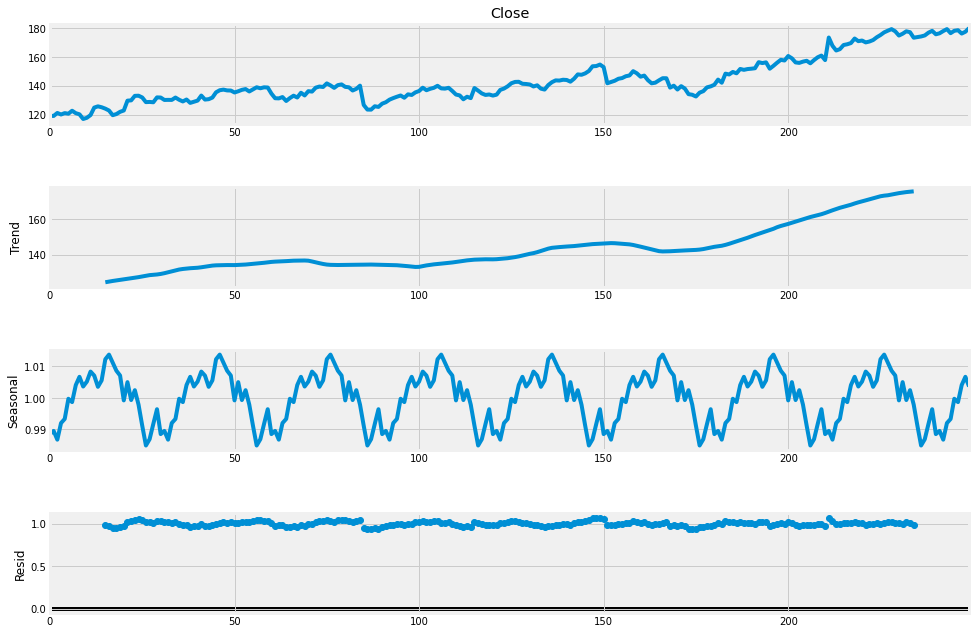

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(yt["Close"],
                            model="multiplicative",
                            period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

In [6]:
yt = yt.set_index("Date")
yt

,Close
Date,
2023-06-26,119.089996
2023-06-27,119.010002
2023-06-28,121.080002
2023-06-29,120.010002
2023-06-30,120.970001
...,...
2024-06-14,178.369995
2024-06-17,178.779999
2024-06-18,176.449997


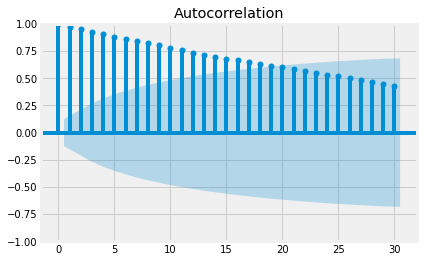

In [7]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(yt, lags=30)
plt.show()

In [8]:
p,d,q = 5,1,2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(yt["Close"], order = (p,d,q))
fitted = model.fit()
print(fitted.summary())

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -573.898
Date:                Mon, 24 Jun 2024   AIC                           1163.796
Time:                        20:49:30   BIC                           1191.936
Sample:                             0   HQIC                          1175.123
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6183      0.060    -10.360      0.000      -0.735      -0.501
ar.L2         -0.9678      0.093    -10.438      0.000      -1.149      -0.786
ar.L3         -0.1504      0.126     -1.194      0.2

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
predictions = fitted.predict()
print(predictions)

Date
2023-06-26      0.000000
2023-06-27    119.089931
2023-06-28    119.016727
2023-06-29    120.903908
2023-06-30    120.060016
                 ...    
2024-06-14    177.771224
2024-06-17    179.046564
2024-06-18    177.719615
2024-06-20    176.070342
2024-06-21    179.082717
Name: predicted_mean, Length: 250, dtype: float64


In [10]:
import warnings
model = sm.tsa.statespace.SARIMAX(yt["Close"],
                                  order=(p,d,q),
                                  seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimi

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -563.635
Date:                            Mon, 24 Jun 2024   AIC                           1157.271
Time:                                    20:56:34   BIC                           1209.292
Sample:                                         0   HQIC                          1178.239
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1026      0.352     -0.291      0.771      -0.793       0.588
ar.L2         -0.8879      0.420   

In [11]:
predictions = model.predict(len(yt),len(yt)+10)
print(predictions)

250    181.149761
251    181.388633
252    181.669939
253    180.592064
254    179.175142
255    180.701615
256    180.645223
257    181.571409
258    180.816293
259    179.879246
260    180.553463
Name: predicted_mean, dtype: float64


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='Date'>

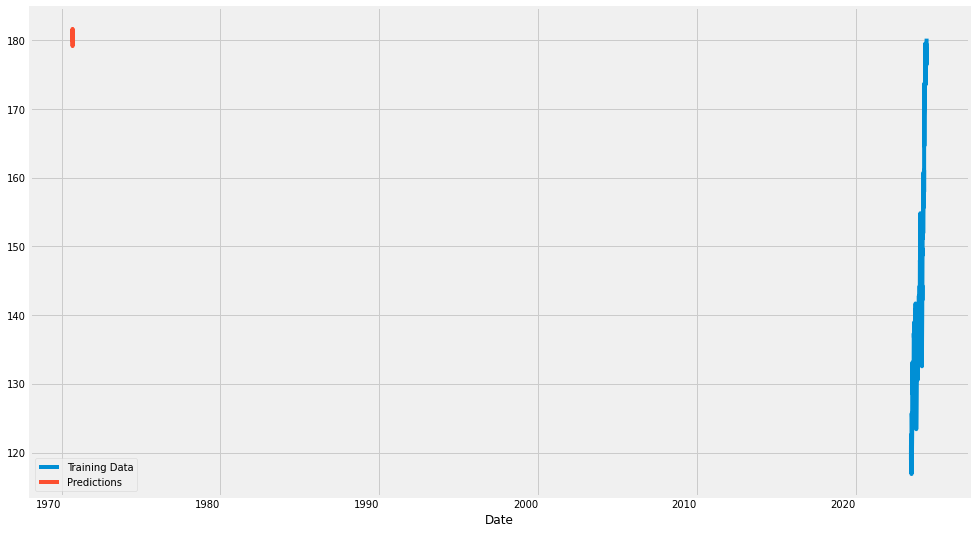

In [12]:
yt["Close"].plot(legend=True, label="Training Data", figsize = (15,10))
predictions.plot(legend=True, label = "Predictions")